# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [57]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=8)
labels = model.fit_predict(X)

In [58]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
score       

0.5398740895316613

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [59]:
model2 = KMeans(n_clusters=5)
labels2 = model2.fit_predict(X)

In [60]:
score = silhouette_score(X, labels2)
score

0.5489844814655053

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [61]:
model3 = KMeans(n_clusters=3)
labels3 = model3.fit_predict(X)

In [62]:
score = silhouette_score(X, labels3)
score

0.5711433362122481

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

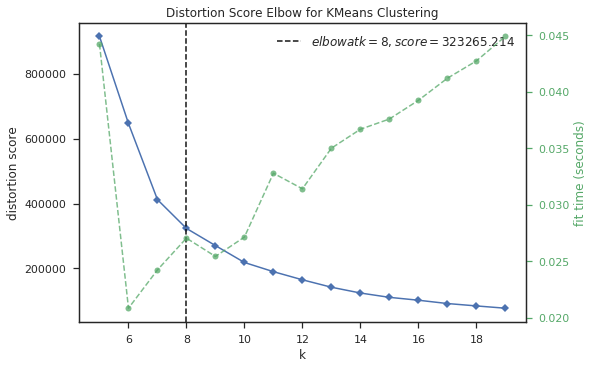

In [63]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,20), metric="distortion")

visualizer.fit(X)        
visualizer.show()

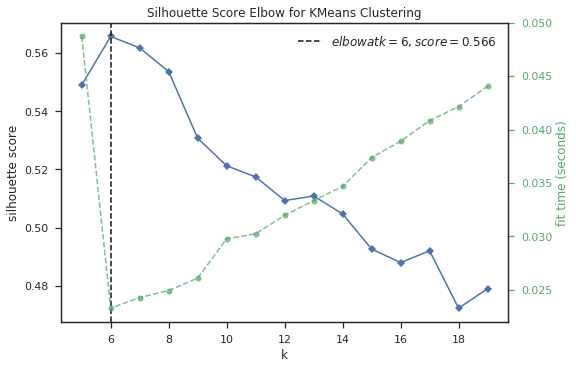

In [64]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,20), metric="silhouette")

visualizer.fit(X)        
visualizer.show()

/home/carolina/.local/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/carolina/.local/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


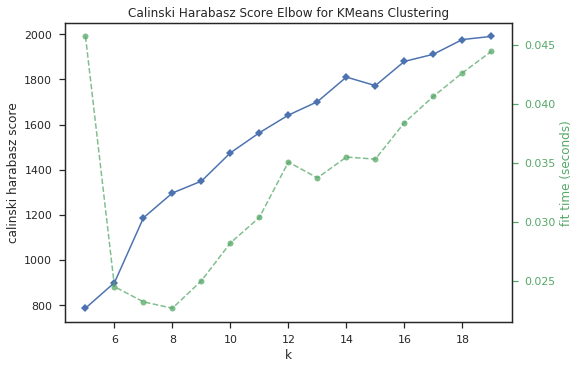

In [65]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,20), metric="calinski_harabasz")

visualizer.fit(X)        
visualizer.show()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

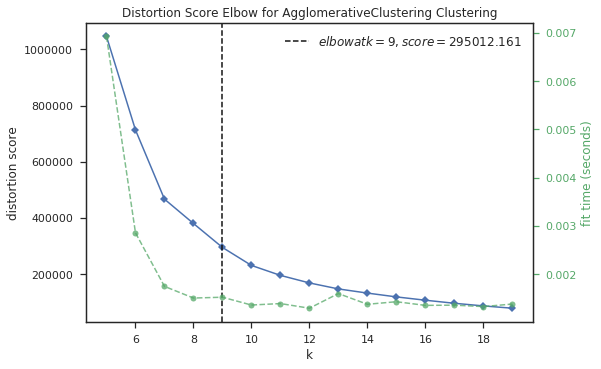

In [67]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(5,20), metric="distortion")

visualizer.fit(X)        
visualizer.show()

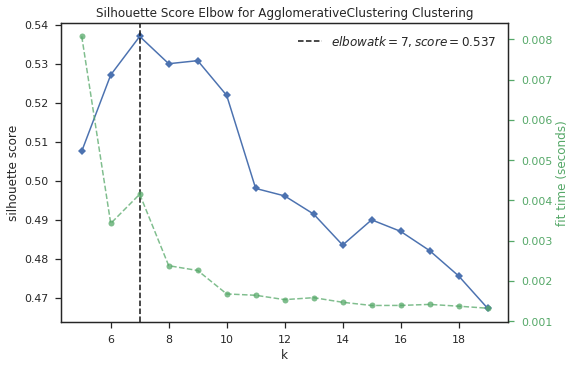

In [68]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(5,20), metric="silhouette")

visualizer.fit(X)        
visualizer.show()

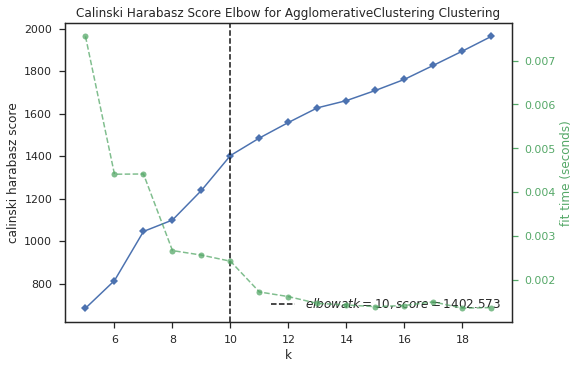

In [69]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(5,20), metric="calinski_harabasz")

visualizer.fit(X)        
visualizer.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [75]:
# No se como hacer. Me genera miles de charts.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [70]:
from sklearn.decomposition import PCA

pca = PCA()
a = pca.fit_transform(X)

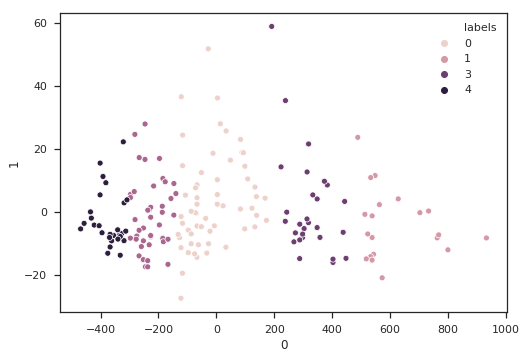

In [72]:
df = pd.DataFrame(a)
df['labels'] = X['labels']

sns.scatterplot(x=df[0], y=df[1], hue ='labels', data = df)
plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [76]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 18.134782
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.949390
[t-SNE] KL divergence after 300 iterations: 0.189814
